In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_pickle("saved_df.pkl") 

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(707, 9)

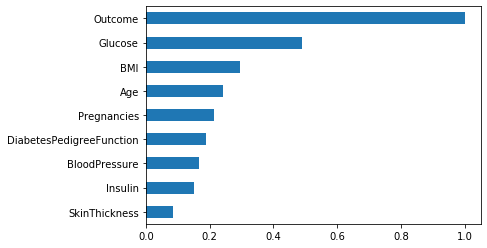

In [5]:
df.corr()["Outcome"].sort_values().plot.barh()

In [6]:
X=df.drop(["Outcome"], axis=1) # stratify 
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

In [7]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        94
           1       0.71      0.60      0.65        48

    accuracy                           0.78       142
   macro avg       0.76      0.74      0.75       142
weighted avg       0.78      0.78      0.78       142



In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        94
           1       0.69      0.52      0.60        48

    accuracy                           0.76       142
   macro avg       0.74      0.70      0.71       142
weighted avg       0.75      0.76      0.75       142



### SCALE decision tree deyapmayin
##KNN, Kperest, random fores t yapmaya gerek yok
##DISTANE gorunce kein yap SCALE

## Decision Tree

In [9]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=42)

In [10]:
dt_model = DecisionTreeClassifier().fit(X_train, y_train)

In [11]:
y_pred = dt_model.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[74, 20],
       [26, 22]], dtype=int64)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76        94
           1       0.52      0.46      0.49        48

    accuracy                           0.68       142
   macro avg       0.63      0.62      0.63       142
weighted avg       0.67      0.68      0.67       142



### Random Forest

In [13]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [14]:
y_pred = dt_model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[74, 20],
       [26, 22]], dtype=int64)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76        94
           1       0.52      0.46      0.49        48

    accuracy                           0.68       142
   macro avg       0.63      0.62      0.63       142
weighted avg       0.67      0.68      0.67       142



### Random Forest with Tunning

In [16]:
rf= RandomForestClassifier()

In [17]:
rf_model.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

In [18]:
rf_params = {"n_estimators":[50, 100, 300],
              "max_depth":[3,5,7],
              "max_features": [2,4,6,8],
              "min_samples_split": [2,4,6]}

In [19]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   44.8s finished


In [20]:
rf_cv_model.best_params_

{'max_depth': 3, 'max_features': 6, 'min_samples_split': 2, 'n_estimators': 50}

In [21]:
rf_tuned = RandomForestClassifier(max_depth = 5,
                                  max_features = 2,
                                  min_samples_split = 4,
                                  n_estimators = 50).fit(X_train, y_train)

In [22]:
y_pred = rf_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[84, 10],
       [21, 27]], dtype=int64)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        94
           1       0.73      0.56      0.64        48

    accuracy                           0.78       142
   macro avg       0.76      0.73      0.74       142
weighted avg       0.78      0.78      0.77       142



max_features : {"auto", "sqrt", "log2"}, int or float, default="auto"
    The number of features to consider when looking for the best split:

In [24]:
rf_tuned

RandomForestClassifier(max_depth=5, max_features=2, min_samples_split=4,
                       n_estimators=50)

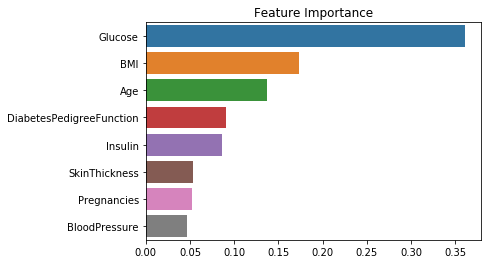

In [25]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

### **XGBOOST

In [26]:
!pip install xgboost

In [27]:
from xgboost import XGBClassifier

In [28]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [29]:
y_pred = xgb_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[76, 18],
       [23, 25]], dtype=int64)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        94
           1       0.58      0.52      0.55        48

    accuracy                           0.71       142
   macro avg       0.67      0.66      0.67       142
weighted avg       0.70      0.71      0.71       142



### Tunning XGBOOST

In [31]:
xgb= XGBClassifier()

In [32]:
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

In [33]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 5,
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   14.2s finished


In [34]:
xgb_cv_model.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1}

In [35]:
xgb_tuned = XGBClassifier(learning_rate= 0.01, 
                                max_depth= 3, 
                                n_estimators= 500, 
                                subsample= 0.8).fit(X_train, y_train)

In [36]:
y_pred = xgb_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[81, 13],
       [21, 27]], dtype=int64)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        94
           1       0.68      0.56      0.61        48

    accuracy                           0.76       142
   macro avg       0.73      0.71      0.72       142
weighted avg       0.75      0.76      0.75       142



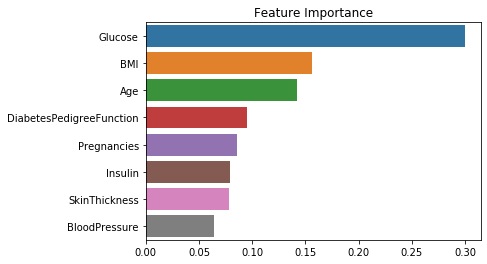

In [58]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()